In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import shap
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from xgboost.sklearn import XGBRegressor

In [3]:
starcraft_loc = '../data/interimStarcraft_cleaned.csv'
#using index_col = 0 to drop the uncessary number column added by saving the data from the previous notebook.
starcraft = pd.read_csv(starcraft_loc,index_col = 0)
starcraft.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3337 entries, 0 to 3336
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   GameID                3337 non-null   int64  
 1   LeagueIndex           3337 non-null   int64  
 2   Age                   3337 non-null   int64  
 3   HoursPerWeek          3337 non-null   int64  
 4   TotalHours            3337 non-null   int64  
 5   APM                   3337 non-null   float64
 6   SelectByHotkeys       3337 non-null   float64
 7   AssignToHotkeys       3337 non-null   float64
 8   UniqueHotkeys         3337 non-null   int64  
 9   MinimapAttacks        3337 non-null   float64
 10  MinimapRightClicks    3337 non-null   float64
 11  NumberOfPACs          3337 non-null   float64
 12  GapBetweenPACs        3337 non-null   float64
 13  ActionLatency         3337 non-null   float64
 14  ActionsInPAC          3337 non-null   float64
 15  TotalMapExplored     

In [4]:
#Split for testing feature importance on the whole set
SCfeatureNames = ['Age','HoursPerWeek','TotalHours','APM','AssignToHotkeys','UniqueHotkeys','MinimapAttacks','MinimapRightClicks','NumberOfPACs','GapBetweenPACs','ActionLatency','ActionsInPAC','TotalMapExplored','WorkersMade','UniqueUnitsMade','ComplexUnitsMade','ComplexAbilitiesUsed']
X = starcraft[SCfeatureNames]
y = starcraft['LeagueIndex']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.25,random_state=420)

In [8]:
model = XGBRegressor(n_estimators=1000, max_depth=10, learning_rate=0.001)
# Fit the Model
model.fit(X, y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.001, max_delta_step=0,
             max_depth=10, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=12,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [9]:
# load JS visualization code to notebook
shap.initjs()

In [10]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


In [11]:
i = 4
shap.force_plot(explainer.expected_value, shap_values[i], features=X.iloc[i], feature_names=X.columns)

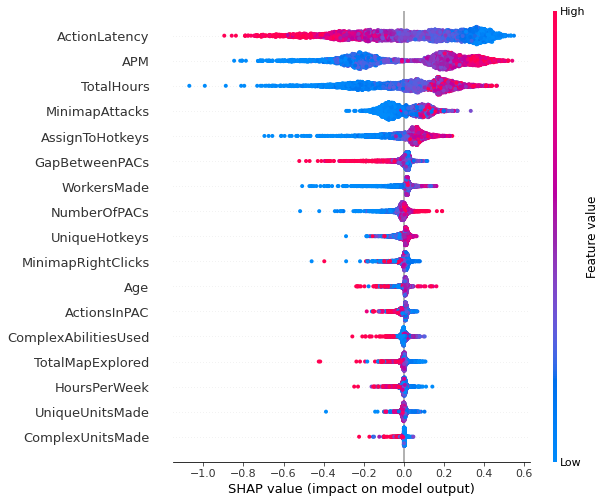

In [12]:
shap.summary_plot(shap_values, features=X, feature_names=X.columns)

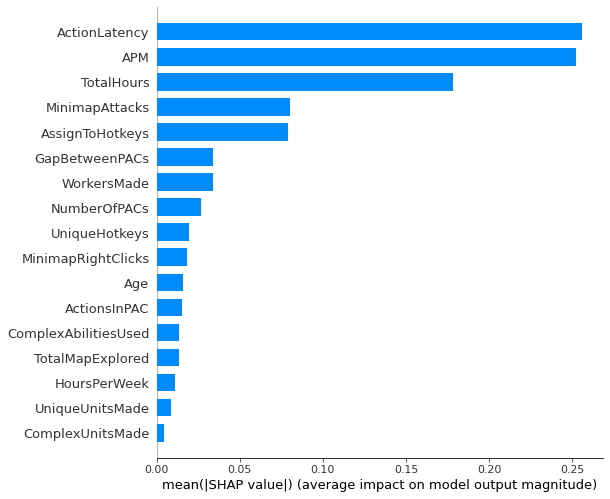

In [14]:
shap.summary_plot(shap_values, features=X, feature_names=X.columns, plot_type='bar')